In [1]:
# PYTHON IMPORTS
import os
import copy
from tqdm.notebook import trange, tqdm

# IMAGE IMPORTS 
from PIL import Image
import cv2

# DATA IMPORTS 
import random
import h5py
import numpy as np
import glob

# PLOTTING
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# NEURAL NETWORK
import torch

# MY OWN CLASSES
from TileLocator import *
Image.MAX_IMAGE_PIXELS = 933120000

In [2]:
data_dir = r"C:\Users\fhacesga\OneDrive - University Of Houston\AAA_RECTDNN\data/"

model_checkpoint = f"{data_dir}TileLocator/080323.pth"

In [3]:
# Initialize model
model = torch.load(model_checkpoint)
model = model.to("cuda")

In [4]:
prep_folder   = f"{data_dir}TileLocator/in_prepped_v2/"    
output_folder = f"{data_dir}TileLocator/out_v2/"

In [5]:
for filename in os.listdir(prep_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff')):
        image_path = os.path.join(prep_folder, filename)
        output_path = os.path.join(output_folder, filename[:-3] + "png")
        
        # print(f"Processing {filename} and saved to {output_path}")
        print(output_path)
        processed_image = split_and_run_cnn(image_path, model, tilesize=1024, edges=0, dims_rep=[0])
        image = processed_image * 255
        image = np.swapaxes(image, 0, 1)
        # Save the processed image to the output folder
        cv2.imwrite(output_path, image.astype(np.uint8))

C:\Users\fhacesga\OneDrive - University Of Houston\AAA_RECTDNN\data/TileLocator/out_v2/480296IND0_0982.png
[0]


  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\fhacesga\Desktop\FIRMsDigitizing\RECTDNN\TileLocator.py:93: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(output)


C:\Users\fhacesga\OneDrive - University Of Houston\AAA_RECTDNN\data/TileLocator/out_v2/480304IND0_1077.png
[0]


  0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\fhacesga\OneDrive - University Of Houston\AAA_RECTDNN\data/TileLocator/out_v2/48071CIND0A.png
[0]


  0%|          | 0/15 [00:00<?, ?it/s]

C:\Users\fhacesga\OneDrive - University Of Houston\AAA_RECTDNN\data/TileLocator/out_v2/48157CIND0A.png
[0]


  0%|          | 0/15 [00:00<?, ?it/s]

C:\Users\fhacesga\OneDrive - University Of Houston\AAA_RECTDNN\data/TileLocator/out_v2/48201CIND0A.png
[0]


  0%|          | 0/14 [00:00<?, ?it/s]

C:\Users\fhacesga\OneDrive - University Of Houston\AAA_RECTDNN\data/TileLocator/out_v2/48201CIND0D.png
[0]


  0%|          | 0/15 [00:00<?, ?it/s]

C:\Users\fhacesga\OneDrive - University Of Houston\AAA_RECTDNN\data/TileLocator/out_v2/48201CIND0_0992.png
[0]


  0%|          | 0/15 [00:00<?, ?it/s]

C:\Users\fhacesga\OneDrive - University Of Houston\AAA_RECTDNN\data/TileLocator/out_v2/48473CIND0A.png
[0]


  0%|          | 0/15 [00:00<?, ?it/s]

In [24]:
# Load the image
image_path = f'{data_dir}TileLocator/out_v2/48071CIND0A.png'
image = cv2.imread(image_path,)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [58]:
# Apply Gaussian blur to reduce noise and improve edge detection
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform edge detection using Canny
# edges = cv2.Canny(blurred, threshold1=50, threshold2=150)
cv2.imwrite("test.png", gray)

True

In [101]:
# Define the target dimensions for processing
target_dim = (1200, 1200)

# Process the image and get the result
def upscale_to_max(image, target_dim, threshold=50):
    resized_image = cv2.resize(image, target_dim, interpolation=cv2.INTER_LINEAR)
    resized_image[resized_image > threshold] = 255  # Set pixel values above threshold to max (255)
    return resized_image

# Rescale the image to the target dimensions
resized_image = cv2.resize(image, target_dim, interpolation=cv2.INTER_AREA)

# Convert the resized image to grayscale
threshold = 10
gray = np.logical_or(resized_image[:, :, 0] > threshold, resized_image[:, :, 1] > threshold) * 255
gray = gray.astype(np.uint8)


# Apply Hough Transform to detect lines
lines = cv2.HoughLinesP(gray, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=35)
print(lines)

# Draw the detected lines on a copy of the resized image
image_with_lines = resized_image.copy() * 0
for line in lines:
    x1, y1, x2, y2 = line[0]
    
    colors = np.random.randint(255, size=3).astype(np.int32)
    color = ( int (colors [ 0 ]), int (colors [ 1 ]), int (colors [ 2 ])) 
    cv2.line(image_with_lines, (x1, y1), (x2, y2), color, 2)

# Rescale the image with detected lines back to the original dimensions
result_image = cv2.resize(image_with_lines, image.shape[:2][::-1], interpolation=cv2.INTER_LINEAR)
cv2.imwrite("test.png", result_image)
cv2.imwrite("test1.png", image)

[[[  18 1182   18   22]]

 [[1181  801 1181   18]]

 [[  19 1182  520 1182]]

 [[ 512   18 1180   18]]

 [[  83  720  938  675]]

 [[ 195  325  926  287]]

 [[  88  525  932  481]]

 [[  89  914  760  879]]

 [[  31   35  524   35]]

 [[  31   33  522   33]]

 [[ 278  906  758  881]]

 [[  37  185  511  185]]

 [[  40  186  511  186]]

 [[ 329  805  879  776]]

 [[  31   34  524   34]]

 [[  30  155  557  155]]

 [[  30  165  557  165]]

 [[ 512   19  945   19]]

 [[ 999 1182  999  801]]

 [[1180 1177 1180  800]]

 [[1070 1181 1070  800]]

 [[1000 1182 1000  801]]

 [[ 197  422  624  400]]

 [[1034 1174 1034  800]]

 [[ 807  444  820  821]]

 [[  30  166  557  166]]

 [[ 329  806  880  777]]

 [[  72   76  524   76]]

 [[  73   77  524   77]]

 [[ 523  113  914   92]]

 [[ 202  617  574  598]]

 [[ 547 1099  795 1099]]

 [[ 547 1098  795 1098]]

 [[ 923  204  936  604]]

 [[ 208  227  558  208]]

 [[ 802  259  817  673]]

 [[ 556  112  914   93]]

 [[ 501  360  692  367]]

 [[ 799  116

True

(0.0, 1200.0)

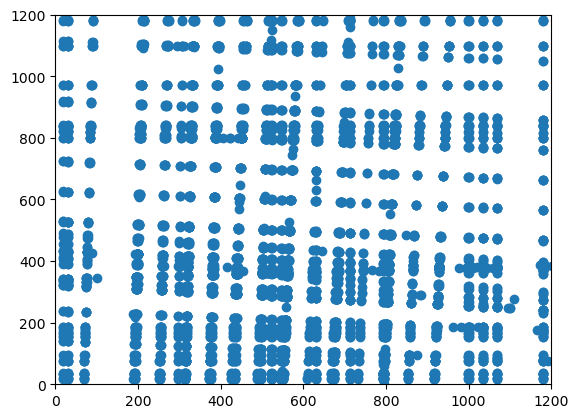

In [92]:
def line_intersection(line1, line2):
    x1, y1, x2, y2 = line1
    x3, y3, x4, y4 = line2

    denominator = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)

    if denominator == 0:
        return None  # Lines are parallel or coincident

    px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / denominator
    py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / denominator

    return px, py

def find_all_intersections(lines):
    intersections = []
    num_lines = len(lines)

    for i in range(num_lines - 1):
        for j in range(i + 1, num_lines):
            intersection = line_intersection(lines[i][0], lines[j][0])
            if intersection:
                intersections.append([intersection[0], intersection[1]])

    return intersections

intersections = find_all_intersections(lines)
intersections = np.array(intersections)

plt.scatter(intersections[:, 0], intersections[:, 1])
plt.xlim((0, 1200))
plt.ylim((0, 1200))